<div>
  <img style="float: left;"  width="140" src=" 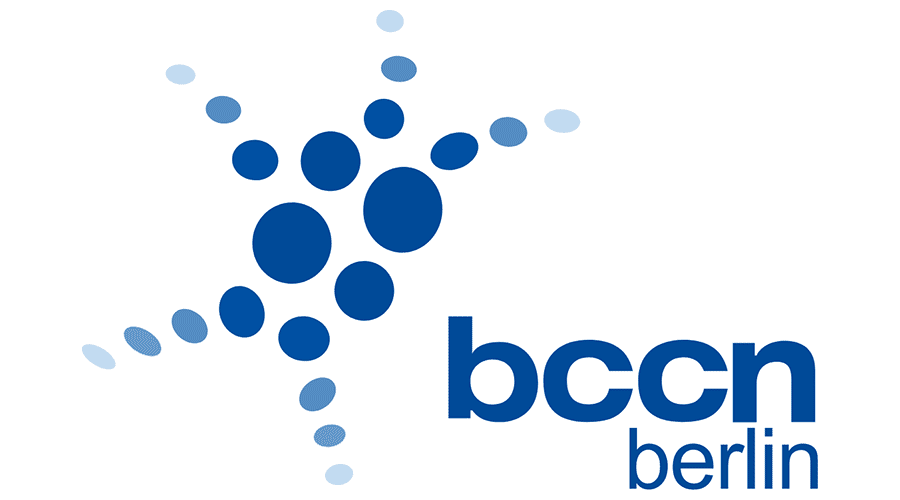">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Denis Alevi
    <br>(denis.alevi@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (a single `.ipynb`). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

In [1]:
NAMES = ["", ""]
GROUP = ""

In [2]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 4: Perceptual Bistability

In [3]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [4]:
# You can add your additional package imports here
from itertools import combinations_with_replacement 
# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1: A model of binocular rivalry (7 points)

In this exercise we will explore a model of binocular rivalry presented by [Laing and Chow (2002)](https://link.springer.com/content/pdf/10.1023/A:1014942129705.pdf).
While their paper included a spiking network model, we will concern ourselves only with their reduced population rate model.

### 1.1 Read (parts) of the paper
Download the paper by Laing and Chow (2002) using the link provided above. Read at least the **Abstract** and the chapter **3. Reduced Description**, up to the definition of equation (9).

Here is a copy of equations (1 - 4), which you will implementing in this exercise:

$$
\begin{align}
    \frac{du_1}{dt} &= &&−u_1 &+ &&f (\alpha u_1 g_1 − \beta u_2 g_2 − a_1 + I_1 ) && \qquad\text{(1)} \\
    \frac{du_2}{dt} &= &&−u_2 &+ &&f (\alpha u_2 g_2 − \beta u_1 g_1 − a_2 + I_2 ) && \qquad\text{(2)} \\
    \tau_a \frac{da_1}{dt} &= &&-a_1 &+ &&\phi_a f(\alpha u_1 g_1 - \beta u_2 g_2 - a_1 + I_1) && \qquad\text{(3)} \\
    \tau_a \frac{da_2}{dt} &= &&-a_2 &+ &&\phi_a f(\alpha u_2 g_2 - \beta u_1 g_1 - a_2 + I_2) && \qquad\text{(4)} \\
\end{align}
$$

### 1.2 Integrate the ordinary differential equations (ODEs) of the population rate model

#### 1.2 a) Implement the ODEs (2 points)

Complete the function `laing_chow` which implements equations (1-4) from Laing and Chow (2002) and which can be given to [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) as its first argument.

The parameters of the model should be additional arguments of `laing_chow` such that you can investigate the behavior of the model for different parameter settings. The model should use the following default parameters: $\alpha = 0.2$, $\beta = 0.4$, $\phi_a = 0.4$, $\tau_a = 20$, $g_{1} = g_{2} = 1$.


In [5]:
def laing_chow(y, t, I1, I2, alpha=0.2, beta=0.4, g1=1, g2=1, phi_a=0.4, tau_a=20):
    """
    Function to compute the derivatives in the ODEs defined in equations (1-4) 
    in Laing and Chow (2002).
    
    These ODEs can be integrated by passing this function to `scipy.integrate.odeint`.
    
    Parameters
    ----------
    y : numpy.ndarray
        Array of dynamical variables at time `t`, which dynamics are defined by the ODEs
        in equations (1-4). That means, `y = [u1, u2, a1, a2]`
    t : float
        Time point for which to compute the derivatives of `y`.
    I1, I2, alpha, beta, g1, g2, phi, tau : float
        Model parameters. See Laing and Chow (2002), chapter "3. Reduced Description"
        for their meaning.
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """

    u1 = y[0]
    u2 = y[1]
    a1 = y[2]
    a2 = y[3]

    dydt = np.zeros_like(y)

    temp = np.heaviside(np.array([
        alpha*u1*g1 - beta*u2*g2 - a1 + I1,
        alpha*u2*g2 - beta*u1*g1 - a2 + I2]), 0)
    
    dydt[0] = temp[0]
    dydt[1] = temp[1]
    dydt[2] = phi_a*temp[0]
    dydt[3] = phi_a*temp[1]

    dydt = dydt - y
    
    dydt[2] = dydt[2]/tau_a
    dydt[3] = dydt[3]/tau_a

    return dydt

In [6]:
""" Test that the function `laing_chow` is defined """

assert_var_defined("laing_chow", func=True)

#### 1.2 b) Integrate the ODEs (1 point)

Reproduce qualitatively(Fig. 9) of Laing and Chow (2002) by integrating the differential equation defined by `laing_chow` using `odeint(laing_chow, y0, t, args=(I1, I2))` where `y0` should contain the initial values $u_{1} = 1$, $u_{2} = 0$, $a_{1} = 0.1$, $a_{2} = 0.25$. `t` should range from $0$ to $500$ and `I1` and `I2` should be the inputs $I_{1} = 0.43, I_{2} = 0.5$. Write a plotting function, you can reuse it below.

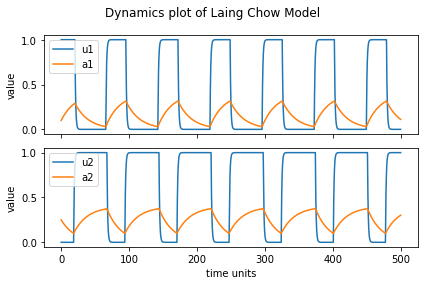

In [7]:
# YOUR CODE HERE
def plot_lc_dynamics(t, res):
    fig, ax = plt.subplots(2,1, sharex=True)

    ax[0].plot(t, res[:, 0], label='u1')
    ax[0].plot(t, res[:, 2], label='a1')
    ax[0].legend()
    ax[0].set_ylabel('value')

    ax[1].plot(t, res[:, 1], label='u2')
    ax[1].plot(t, res[:, 3], label='a2')
    ax[1].legend()
    ax[1].set_ylabel('value')
    ax[1].set_xlabel('time units')
    fig.suptitle('Dynamics plot of Laing Chow Model')
    fig.tight_layout()
    plt.show()

del_t = 1e-1
y0 = [1.0, 0.0, 0.1, 0.25]
t = np.arange(0, 500, del_t)
I1 = 0.43
I2 = 0.5
res = odeint(laing_chow, y0, t, args=(I1, I2))
plot_lc_dynamics(t, res)

### 1.3 Compute dominance durations

Let us define population 1 as active if $u_{1} > u_{2}$ and equivalently for population 2. 
Determine the dominance durations $D_{1}$ during which population 1 is active and $D_2$, during which populaion 2 is active, from your simulations.

#### 1.3 a) Implement the function `dominance_durations` (0.5 points)

To do this write a function `dominance_durations(x1, x2, t)` where `x1` and `x2` are arrays containing the simulated states and `t` is an array of the same length containing the corresponding times. The function should return an array containing the duration of each dominance period in the data. 

In [8]:
def dominance_durations(x1, x2, t):
    """
    Compute the dominance duration.
    
    Parameters
    ----------
    x1, x2 : numpy.ndarray
        Arrays containing the simulated states.
    t : numpy.ndarray
        Array of times corresponding to states in `x1` and `x2`.
    
    Returns
    -------
    durations : numpy.ndarray
        Array of durations for each dominance period in the data.
    """

    # YOUR CODE HERE
    x1_dom = x1>x2
    idx = np.where(x1_dom[:-1] != x1_dom[1:])[0]
    #idx = np.insert(idx, 0, 0)

    time_x = np.diff(t[idx])

    if not x1_dom[0]:
        x1_period = time_x[::2]
        x2_period = time_x[1::2]
    else:
        x1_period = time_x[1::2]
        x2_period = time_x[::2]
        
    length = np.min((x1_period.shape[0], x2_period.shape[0]))
    return np.vstack((x1_period[:length], x2_period[:length]))

In [9]:
""" Test that the function `dominance_durations` is defined """

assert_var_defined("dominance_durations", func=True)

#### 1.3 b) Compare the dominance durations in your data to the results of equation (9) (0.5 points)

Use your function to compute the dominance durations from your simulation in exercise 1.2. Then compute the analytical dominance durations $T_1$ and $T_2$ defined in equation (9) in Laing and Chow (2002).


In [10]:
# YOUR CODE HERE
dominance_durations(res[:,0], res[:,1], t)

array([[28. , 28. , 28. , 28. , 28.1, 28. ],
       [47.1, 48.7, 48.8, 48.8, 48.7, 48.7]])

#### 1.3 b) Explain your observations (0.5 points)

Why are the dominance durations from your simulation different from the analytically computed $T_1$ and $T_2$? (Hint: Reading the paper section that describes the derivation of equation (9) helps here)

By looking at figure 10 at the paper, I = 0.43 gives value around 50 while I = 0.5 return value just below 30. These values almost match the duration that is obtained by numerical simulation. The values can be closer if smaller integration period is used (del_t) 

In [11]:
def compute_t(I1, I2, tau=20, beta=0.4, phi=0.4):
    t1 = -tau * np.log((I2-beta)/(beta + phi - I1))
    t2 = -tau * np.log((I1-beta)/(beta + phi - I2))
    return t1,t2
compute_t(phi=0.4, tau=20, I1=I1, I2=I2, beta=0.4)

(26.16665639300358, 46.051701859880936)

### 1.4 Study the parameters of the model

#### 1.4 a) For which parameters do the oscillations stop? (1 point)

The paper states that, if the inputs are larger than $-\alpha + \beta + \varphi $, both populations become active and oscillation will stop. Can you confirm this? 

small increment above the threshold current drive the system to stay at its stable fixed points. There are small dominance changes due to numerical simulation.

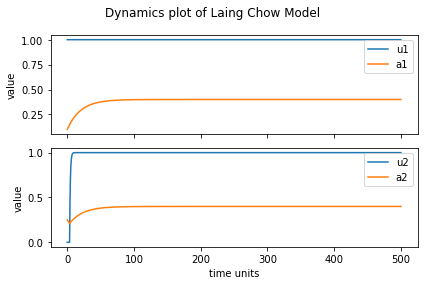

for I1: 0.6010000000000001 and I2: 0.6100000000000001
the durations are:
[[ 0.9  1.5  1.5  1.3  3.2  6.5  3.5  1.5  6.9  2.6  0.2  3.9  1.2  1.7
   6.8 13.4  0.1  4.7  7.6  1.5  1.8 10.3 13.7 16.9 12.3 19.3  2.5 43.1]
 [ 2.2  1.6  0.1  2.4  4.6 10.5  5.5  0.7  0.3  6.4  0.1  8.1  4.4  2.
   0.4  1.   7.2 10.9  0.9  5.1  5.2  2.2  2.3  9.3 11.4 18.9 26.2  2.2]]




In [12]:
thr=0.4 + 0.4 - 0.2

I1 = thr + 1e-3
I2 = thr + 1e-2

res = odeint(laing_chow, y0, t, args=(I1, I2))
plot_lc_dynamics(t, res)
print('for I1: {} and I2: {}'.format(I1, I2))
print('the durations are:')
print(dominance_durations(res[:,0], res[:,1], t))
print('\n')


#### 1.4 b) What about the parameters inbetween? (0.5 point)

Simulate and plot your results for input values between these new and the original input values.

for I1: 0.5000000000000001 and I2: 0.5000000000000001


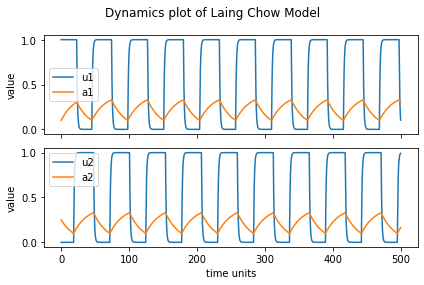

the durations are:
[[26.5 26.5 26.5 26.5 26.4 26.5 26.5 26.4 26.5]
 [24.9 26.5 26.4 26.4 26.5 26.5 26.4 26.5 26.5]]
theoretical periods:
(21.972245773362175, 21.972245773362175)


for I1: 0.5000000000000001 and I2: 0.5900000000000001


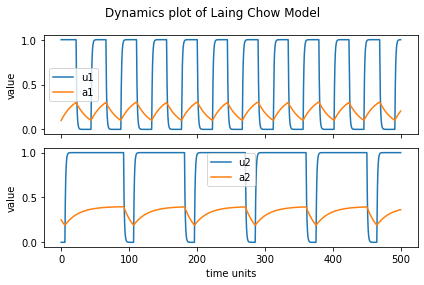

the durations are:
[[19.  18.8 18.8 18.9 18.9]
 [70.  70.7 70.7 70.7 70.6]]
theoretical periods:
(9.135168049914288, 14.838746894587524)


for I1: 0.5000000000000001 and I2: 0.5990000000000001


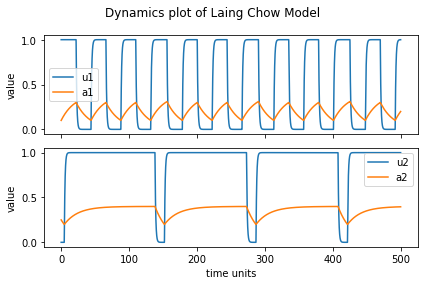

the durations are:
[[  0.5  17.7   0.7  17.6  17.5   0.3]
 [ 87.4  28.3  87.8  28.6 117.2  43.7]]
theoretical periods:
(8.209552998634162, 13.962694441419664)


for I1: 0.5000000000000001 and I2: 0.6010000000000001


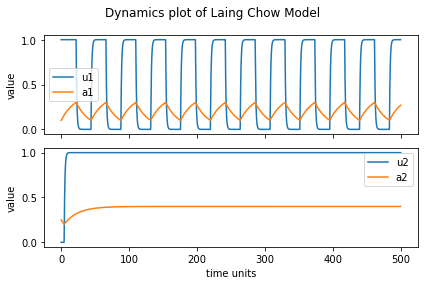

the durations are:
[[ 1.1  0.8  0.5  0.6  0.9]
 [42.9 42.9 87.6 87.3 87. ]]
theoretical periods:
(8.009551331942495, 13.762692774728)


for I1: 0.5900000000000001 and I2: 0.5900000000000001


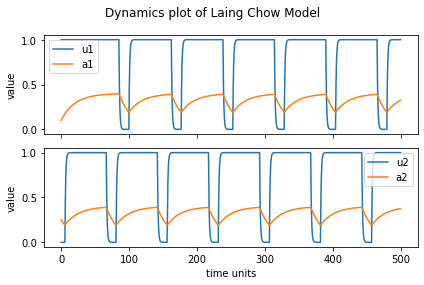

the durations are:
[[ 4.1 13.   3.4  5.4 18.7  3.2  2.5  6.5 22.2  0.4  2.4  3.5 25.1  3.5
   2.7  1.4  3.4 21.9  5.9 26.3  0.6  6.4 25.1]
 [ 0.2  2.4  7.3  2.8  1.3 36.   2.9  2.4  1.5 35.2  4.1  0.8  4.6 35.4
   2.7  1.3  0.2  3.2 39.2  4.2 35.   4.   4.4]]
theoretical periods:
(2.001669171139641, 2.001669171139641)


for I1: 0.5900000000000001 and I2: 0.5990000000000001


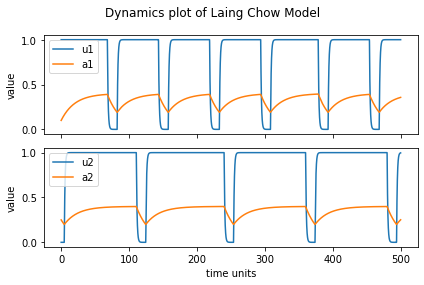

the durations are:
[[12.9  0.3  3.8  0.6  0.6  0.4  0.4 35.5  0.4  2.6  1.8  0.4  5.5  0.2
  34.6  4.1  4.3  1.7  3.3  2.4  6.4  3.3 20.6  0.4  2.5  1.8  0.4  5.4
   0.5]
 [ 2.4  3.7  3.9  2.4  1.4  1.4 39.8  4.1 35.4  4.1 13.1  1.3  3.2  7.3
  21.4  0.4  6.1  2.7 35.7  2.9  2.4  1.7  6.  35.4  4.2 13.1  1.3  3.2
   7.2]]
theoretical periods:
(1.0760541198595148, 1.1256167179717822)


for I1: 0.5900000000000001 and I2: 0.6010000000000001


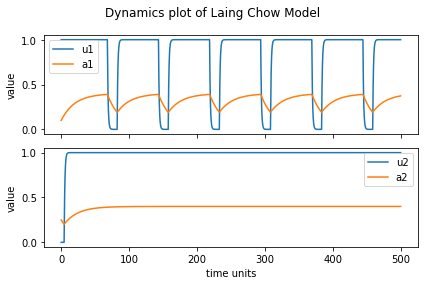

the durations are:
[[ 2.8  5.7  1.2  0.9  4.6  0.7  4.   3.3  2.5  1.1  1.4  1.2  2.1  1.4
   1.5  5.7  0.8  0.8  1.   0.4  2.4  3.6  6.9  6.2  5.5  1.1  0.3  2.4
   3.6  7.2  5.3  5.1  0.3  2.4  3.6  7.   6.   5.4  1.1  0.3  2.4  3.7
   3.   3.9  4.6  3.   0.4  2.4  3.5]
 [ 3.   2.9  0.5  0.8  2.7  6.1  6.5 35.2  2.8  1.7  0.7  0.5  5.5  0.6
   0.5  0.6  2.1  1.1  1.1 35.2  4.1  0.8  4.5  0.9  0.7  3.  35.2  4.2
   0.5  4.6  1.   1.5 39.6  4.2  0.7  4.5  0.9  0.9  3.1 35.1  4.2  0.3
   4.4  1.1  0.9  6.8 36.7  4.1  0.7]]
theoretical periods:
(0.8760524531678484, 0.9256150512801152)


for I1: 0.5990000000000001 and I2: 0.5990000000000001


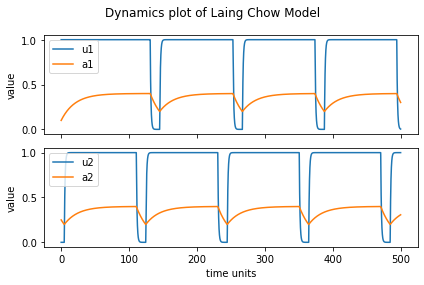

the durations are:
[[12.9  0.3  3.8  0.6  0.6  0.4 12.3  0.2  7.1 26.2  0.5  2.3  3.5  6.8
  12.2  1.8 30.9  0.4  2.4  3.7  3.1  4.   5.   1.2  3.1  2.7  2.7 23.2
   5.5  3.6  0.5  0.7  7.   6.1  1.   1.   7.5 24.5]
 [ 2.4  3.7  3.9  2.4  1.4  1.4 16.   3.2  0.1  2.5 34.8  4.2  0.9  4.6
   1.   3.3 15.1 34.7  4.2  0.3  4.5  0.5  0.9  1.8  0.5  4.1 13.8  4.
  38.2  3.4  4.3  0.9  0.9  5.7  1.   0.3  0.5  7.8]]
theoretical periods:
(0.20000166669165723, 0.20000166669165723)


for I1: 0.5990000000000001 and I2: 0.6010000000000001


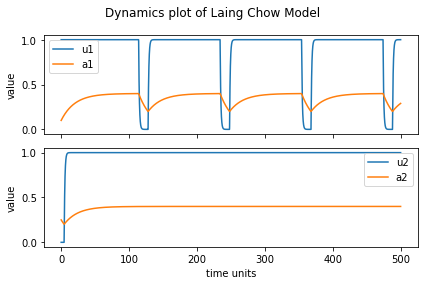

the durations are:
[[ 2.8  5.7  1.2  0.9  4.6  0.7  7.9  0.5  1.2  1.3 16.1  0.9  0.4  0.4
   2.4  3.6  7.   6.   5.4  1.2  0.3  0.2 10.4  5.5  1.   0.2  0.5  2.5
   1.8  4.9  1.1  1.8  1.   8.7  0.1  0.4  2.6  3.7  3.   3.8  4.7  1.8
   7.5  5.6  0.2  0.8]
 [ 3.   2.9  0.5  0.8  2.7  6.1  6.5  6.6  1.1  0.6  1.  11.4  1.  34.8
   4.2  0.5  4.6  0.9  1.1  2.4 11.8  1.6  1.5  0.7 11.4  0.9 34.8  4.2
  13.2  5.   7.  14.2 12.1  5.8  1.1 34.9  4.1  0.1  4.4  1.1  1.   7.
   1.1 10.6 11.3  4. ]]
theoretical periods:
(-8.88178419700125e-15, -1.3322676295501875e-14)


for I1: 0.6010000000000001 and I2: 0.6010000000000001


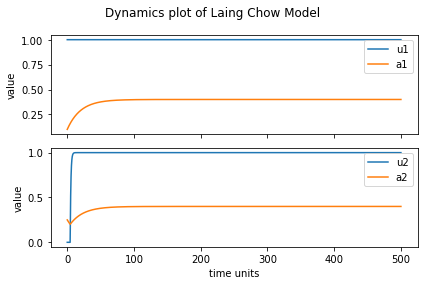

the durations are:
[[ 2.8  5.7  1.2  0.9  4.6  0.7  7.9  0.5  1.2  1.3 16.1  0.9  1.2  1.7
   9.   5.4  0.7 17.1 25.9 13.6  2.1  4.2  8.  68.4]
 [ 3.   2.9  0.5  0.8  2.7  6.1  6.5  6.6  1.1  0.6  1.  11.4  1.   1.1
  10.1 15.  19.7  5.   8.1  9.1 30.2 10.8 35.2  0.9]]
theoretical periods:
(-0.20000166669167677, -0.20000166669167677)




In [13]:
Is = [thr-1e-1, thr-1e-2, thr-1e-3, thr+1e-3]
Is_combination =combinations_with_replacement(Is, 2)

for I1, I2 in Is_combination:
    print('for I1: {} and I2: {}'.format(I1, I2))
    res = odeint(laing_chow, y0, t, args=(I1, I2))
    plot_lc_dynamics(t, res)
    print('the durations are:')
    print(dominance_durations(res[:,0], res[:,1], t))
    print('theoretical periods:')
    print(compute_t(I1=I1, I2=I2))
    print('\n')

#### 1.4 c) Discuss your results (1 point)
Do the analytical dominance periods still fit the experimental results? How do you interpret these results?

b) 

It seems that the bigger the driving value (I1), the smaller the frequency of the oscilation. However, the frequency also depends on the other driving input (I2). Bigger competing input seems to drive the frequency higher. These contradictory behavior stops when the value approaches the threshold, where the system oscillate very slowly. 

c)

The equations for the anaytical period tells the same thing as the experiment in which the value of I2 decrease the T1 and the value of I1 decrease the T1. However the numerical dominance duration seems to be less accurate when the currents are approaching the htreshold current. It seems that the integration step keeps the systems circling around the fixed points and creates a little oscilation. This results in interchanging short period dominance.



# Exercise 2: A model of perceptual bistability (13 points)

Next we will investigate a model of perceptual bistability developed by [Moreno-Bote et
al.(2007)](https://journals.physiology.org/doi/pdf/10.1152/jn.00116.2007). 
The model is an attractor network that relies on noise to drive transitions between network states. Once again, while they also present a spiking network model, we will consider only their mean-field firing rate model.

### 2.1 Read the relevant sections of the paper

Familiarize yourself with the mean-field firing rate model in Moreno-Bote et al. (2007).
Read at least the **Abstract**, **Appendix A** and the second section in Appendix B (**Model with inhibition driven indirectly by an excitatory pool and with weak adaptation**).

The model that you will implement is described by equations (A1, B5, B6, B7) and depicted in Fig. 3B of the main text. The results section **Dynamics of the noise-driven rate-based model and the role of weak adaptation** in the main text discusses it.

Here is a copy of the equations which you will be implementing in this exercise:

$$
\begin{align}
    \frac{dn}{dt} &= - \frac{n}{\tau_s} + \sigma \sqrt{\frac{2}{\tau_s}} \xi(t) &&\text{(A1)} \\
    \tau \frac{d r_A}{dt} &= -r_A + f(\alpha r_A - \beta r_{A,inh} + g_A - \alpha_A + n_A) &&\text{(B5)} \\
    \tau_a \frac{\alpha_A}{dt} &= -\alpha_A + \gamma r_A \\
    f(x) &= \frac{1}{1 + exp\left(-\frac{(x - \theta)}{k} \right)} &&\text{(B6)} \\
    r_{A,inh} &= (r_{pool} + \eta r_A)^2 &&\text{(B7)} \\
    r_{pool} &= [\phi(r_A + r_B) + g_A + g_B]^+
\end{align}
$$

### 2.2 Limits of `odeint` (0.5 points)

Why can’t you use `scipy.integrate.odeint` to implement this model?

The white noise  ξ(t) is the time derivative of Wiener process W(t) which is non differentiable. Therefore it cannot be integrated by ode solver such as odeint.

### 2.3 Write your own integration function

You will have to write your own integration function. 
We will use the Euler-Maruyama method. Euler-Maruyama is an extension of the simple Euler method to stochastic differential equations where we here only consider Gaussian noise processes. Euler-Maruyama integrates differential equations of the form

$$
dY(t) = f(Y(t))dt + g(Y(t))dW(t)
$$

here $f(Y(t))$ is the deterministic part of the differential equation and $g(Y(t))dW(t)$ is the stochastic part where $dW(t)$ is a random variable. 

Euler-Maruyama consists of the following update which your function has to implement:

$$
Y_{t} = Y_{t-1} + f(Y_{t-1})\Delta t + g(Y_{t-1}) \sqrt{\Delta t}W_{t}
$$

Each $W_{t}$ is a sample from a standard normal distribution. 
For more information about Euler-Maruyama see e.g. [Higham (2001)](https://epubs.siam.org/doi/pdf/10.1137/S0036144500378302), or [Wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).


#### 2.3 a) Implement the Euler-Maruyama method (2 points)

Write a function `euler_maruyama(ffun, gfun, y0, t, fargs={}, gargs={})` which implements this equation and which behaves like `odeint`. `ffun` and `gfun` implement $f(Y(t))$  and $g(Y(t))$, respectively. `fargs` and `gargs` are dictionaries of extra arguments that should be passed to `ffun` and `gfun`, respectively. Note, this differs from the argument `args` in `odeint`, which is tuple. We use dictionaries here since this will make passing parameters easier later in the exercise.

Hint: To pass a dicitonary of arguments (`fargs` and `gargs`) as keyword arguments to a function (`ffun` and `gfun`), you can make use of the `**` syntax to unpack a dictionary. If you don't know what that means, have a look at e.g. [this introduction to `*args` and `**kwargs`](https://book.pythontips.com/en/latest/args_and_kwargs.html).

In [14]:
def euler_maruyama(ffun, gfun, y0, t, fargs={}, gargs={}):
    """
    Solve a system of stochastic differential equations (SDE). This function behaves
    like `scipy.integrate.odeint`.
    
    Parameters
    ----------
    ffun : callable
        A function with signature `ffun(y, t, ...)` that computes the deterministic part
        f(Y(t)) of the SDE.
    gfun : callable
        A function with signature `gfun(y, t, ...)` that computes the stochastic part
        g(Y(t)) of the SDE.
    y0 : numpy.ndarray
        Same as `y0` in `scipy.integrate.odeint`.
    t : float
        Same as `t` in `scipy.integrate.odeint`.
    fargs : dict, optional
        Extra keyword arguments passed to `ffun`.
    gargs : dict, optional
        Extra keyword arguments passed to `gfun`.
        
    Returns
    -------
    y : numpy.ndarray
        Same as `y` in `scipy.integrate.odeint`.
    """
    len_y = len(y0)
    len_t = len(t)
    del_t = np.diff(t)[0]
    y = np.zeros((len_y, len_t))
    y[:,0] = y0
    
    noises = []
    tsqrt = np.sqrt(del_t)
    for i in range(len_y):
        noise = tsqrt*np.random.normal(size=len_t)
        noises.append(noise.copy())
    #print(noises)
    noises = np.array(noises)

    for i in range(1, len_t):
        f = ffun(y[:,i-1], t[i], **fargs)*del_t
        g = np.multiply(gfun(y[:,i-1], t[i], **gargs), noises[:, i])
        y[:,i] = y[:,i-1] + f + g
    return y.T

In [15]:
""" Test that the function `euler_maruyama` is defined """

assert_var_defined("euler_maruyama", func=True)

#### 2.3 b) Test your implementation (0.5 points)

Test your function by using `ffun=laing_chow` and `gfun=0` (hint: you can implement `gfun` compactly using Python’s [`lambda`](https://book.pythontips.com/en/latest/lambdas.html) notation). 
For small enough time steps ($\Delta t$ = 0.1 should be sufficient) you should get the same results as with `odeint`.

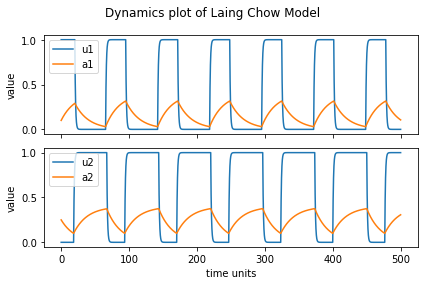

In [16]:
g_laing_chow = lambda y, t, **kwargs : 0

del_t = 1e-1
y0 = [1.0, 0.0, 0.1, 0.25]
t = np.arange(0, 500, del_t)
I1 = 0.43
I2 = 0.5

res = euler_maruyama(laing_chow, g_laing_chow, y0, t, {'I1':I1, 'I2':I2}, {})
plot_lc_dynamics(t, res)

### 2.4 Integrate some typical stochastic processes

#### 2.4 a) Simulate (1.5  points)
Simulate 4 stochastic differential equations. For two simulations, use $f(Y(t)) = 0$, for the other two use $f(Y(t)) = - \frac{1}{\tau} Y(t)$. For all simulations, use $g(Y(t)) = \frac{1}{\tau}$. Run both of these configurations with both, $\tau = 0.1$ and $\tau = 1$. 

Simulate all 4 stochastic differential equations between $t=0$ and $t=5$ with integration time step $\Delta t = 0.01$. Vary your initial condition and pick one for which you can visually see the difference between the stochastic processes.

Plot all results in one figure.

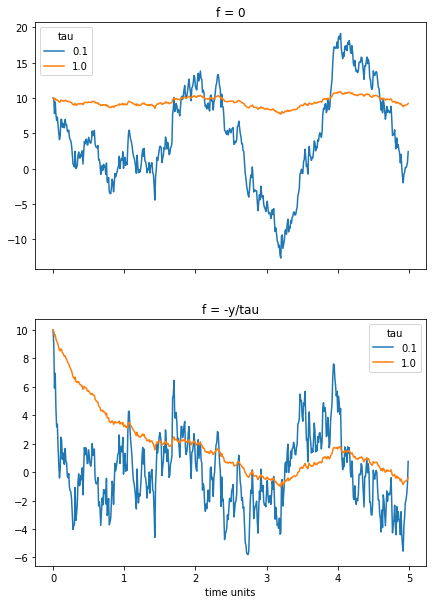

In [17]:
taus = [0.1, 1.0]
del_t = 1e-2
t = np.arange(0, 5, del_t)
y0 = [10]
res = []

fig, ax = plt.subplots(2,1, figsize=(7,10), sharex=True)
res = []
for tau in taus:
    np.random.seed(2)
    gfunc = lambda y, t, **kwargs : 1.0/tau
    ffunc1 = lambda y, t, **kwargs : 0
    res.append(euler_maruyama(ffunc1, gfunc, y0, t, {}, {}))
 
for tau in taus:
    np.random.seed(2)
    gfunc = lambda y, t, **kwargs : 1.0/tau
    ffunc2 = lambda y, t, **kwargs : -y/tau

    res.append(euler_maruyama(ffunc2, gfunc, y0, t, {}, {}))

ax[0].plot(t, res[0], label=str(taus[0]))
ax[0].plot(t, res[1], label=str(taus[1]))
ax[0].set_title('f = 0')
ax[0].legend(title='tau')

ax[1].plot(t, res[2], label=str(taus[0]))
ax[1].plot(t, res[3], label=str(taus[1]))
ax[1].set_title('f = -y/tau')
ax[1].set_xlabel('time units')
ax[1].legend(title='tau')
plt.show()

    #ffunc2 = lambda y, t, **kwargs : -(1/tau)*y

#### 2.4 c) Discuss your results (1.5 points)

Compare the results of the four simulations. 
What is similar? 
What is different? (hint: look up Wiener processes and Ornstein-Uhlenbeck processes. Your answer should incorporate these terms.)

when we set f = 0, the process becomes wiener process in which the increment of each samples are uncorrelated and follow gaussian distribution. Thus, the graph does not goes to a certain value. On the the other hand, when we set the f equal to -y/tau, the process becomes an Ornstein-uhlenbeck processes in which it is attraceted to certain point, in this case 0.

the value of tau determine how damped the process is. It seems that the bigger tau value the more higher frequency get surpressed (lowpass-filtered). it seems also for the case of Ornstein-Uhlenbeck, the value of tau determing how fast the process reaches the mean.

### 2.5 Implement the model for perceptual bistability

#### 2.5 a) Implement the mean-field firing rate model by Moreno-Bote et al. (2007) (3 points)

Complete functions `f_moreno_bote` and `g_moreno_bote` which implement equations (A1, B5, B6, B7) of Moreno-Bote et al. (2007). Follow these instructions:
1. The equations B5 and B7 describe the dynamics of a single population A. You need to simulate a second population B that follows the same dynamics (see Fig. 3B of the main text). That means you will have a total of 6 stochastic differential equations (SDEs).
2. Note the stochastic part of the equations, which is the only part that will be computed in `g_moreno_bote`. 
3. Both functions, `f_moreno_bote` and `g_moreno_bote`, take an array of size 6 as intput for their argument `y` and return an array of the same size.
4. For the automatic corrections to work correctly, the order in which the dynamical variables of the model are passed in `y` has to be

    `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`
    
    
5. You will start by use the same parameter settings as in the paper. Those parameters should be the default function arguments (as which they are already defined). These are:

$$
\begin{align}
    g_{A} = g_{B} &= 0.05 \\
    \alpha &= 0.75 \\
    \beta &= 0.5 \\
    \varphi &= 0.5 \\
    \tau &= 0.01 \\
    \tau_{a} = \tau_{b} &= 2 \\
    \tau_{s} &= 0.1 \\
    \sigma &= 0.03 \\
    \eta &= 0.5 \\
    \theta &= 0.1 \\
    k &= 0.05
\end{align}
$$



In [18]:
def sigmoid(x, theta, k):
    return 1/(1+ np.exp(-(x-theta)/k))

def f_moreno_bote(y, t, g_A=0.05, g_B=0.05, alpha=0.75, beta=0.5, gamma=0.1, phi=0.5,
                  tau=0.01, tau_a=2, tau_s=0.1, eta=0.5, theta=0.1, k=0.05):
    """
    Function that computes the deterministic part of the set of SDEs defined in
    Moreno-Bote et. al (2007).
    
    Parameters
    ----------
    y : numpy.ndarray
        Array of size 6 with deterministic part of the dynamical variables at time `t`:
        `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`.
    t : float
        Time point for which to compute the derivatives of `y`.
    gamma : float
        Model parameter, see Moreno-Bote et al. (2007).
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """

    r_A, r_B, alpha_A, alpha_B, n_A, n_B = y.tolist()

    r_pool = phi * (r_A + r_B) + g_A + g_B
    r_pool = r_pool * (r_pool > 0)

    #  Population A
    d_n_A = -n_A / tau_s

    r_inh_A = (r_pool + eta * r_A) ** 2 
    d_r_A = (-r_A + sigmoid(alpha*r_A - beta*r_inh_A + g_A - alpha_A + n_A, theta, k)) / tau
    
    d_alpha_A = (-alpha_A + gamma * r_A)/tau_a

    #  Population B
    d_n_B = -n_B / tau_s
    
    r_inh_B = (r_pool + eta * r_B) ** 2 
    d_r_B = (-r_B + sigmoid(alpha*r_B - beta*r_inh_B + g_B - alpha_B + n_B, theta, k)) / tau
    d_alpha_B = (-alpha_B + gamma * r_B)/tau_a

    dydt = np.array([d_r_A, d_r_B, d_alpha_A, d_alpha_B, d_n_A, d_n_B])

    return dydt


def g_moreno_bote(y, t, sigma=0.03, tau_s=0.1):
    """
    Function that computes the stochastic part of the set of SDEs defined in
    Moreno-Bote et. al (2007).
    
    Parameters
    ----------
    y : numpy.ndarray
        Array of size 6 with stochastic part of the dynamical variables at time `t`:
        `y = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]`.
    t : float
        Time point for which to compute the derivatives of `y`.
    
    Returns
    -------
    dydt : numpy.ndarray
        Derivatives of `y` at time `t`.
    """
    # YOUR CODE HERE
    dydt = np.zeros_like(y)
    g = sigma * np.sqrt(2.0 / tau_s)
    dydt[-2] = g
    dydt[-1] = g  
    
    return dydt

In [19]:
""" Test that the functions `f_moreno_bote` and `g_moreno_bote` are defined """

for function in ["f_moreno_bote", "g_moreno_bote"]:
    assert_var_defined(function, func=True)

#### 2.5 b) Simulate the model (1 point)

Simulate the model from $t=0$ to $t=20$ with $\Delta t = 0.01$ with the same parameters as in the paper (that means use the default $\gamma = 0.1$).

Use the following initial conditions for $t=0$:

$$
\begin{align}
    r_{A} &= 1 \\
    r_{B} &= 0.01 \\
    \alpha_{A} &= 0 \\
    \alpha_{B} &= 0.04 \\
    n_{A} = n_{B} &= 0
\end{align}
$$

Visualize the results using three subplots: Firing rates, hyperpolarizing currents and noise.

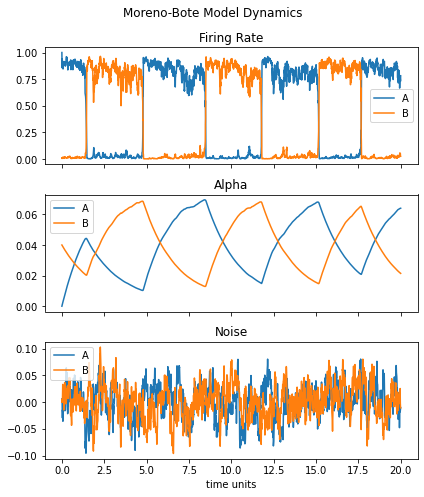

In [20]:
def plot_moreno_bote_dynamics(res, t):

    fig, ax = plt.subplots(3, 1, figsize=(6,7), sharex=True)

    ax[0].plot(t, res[:,0], label='A')
    ax[0].plot(t, res[:,1], label='B')
    ax[0].set_title('Firing Rate')
    ax[0].legend()

    ax[1].plot(t, res[:,2], label='A')
    ax[1].plot(t, res[:,3], label='B')
    ax[1].set_title('Alpha')
    ax[1].legend()

    ax[2].plot(t, res[:,4], label='A')
    ax[2].plot(t, res[:,5], label='B')
    ax[2].set_title('Noise')
    ax[2].legend()
    ax[2].set_xlabel('time units')

    fig.suptitle('Moreno-Bote Model Dynamics')
    fig.tight_layout()
    plt.show()

del_t = 0.01
t = np.arange(0, 20, del_t)

y0 = [1, 0.01, 0, 0.04, 0, 0]

res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t)

plot_moreno_bote_dynamics(res, t)

### 2.6 Calculate the dominance durations (1 point)

Now simulate for $t$ up to 500 (again with $\Delta t$ = 0.01). 
Determine the dominance durations (if you implemented it correctly, you can simply use function dominance durations from exercise 1). 
Plot a histogram of the dominance durations (write a function, you can reuse it below).
What is the mean of the dominance durations? Mark it in the histogram (e.g. with `plt.axvline`).

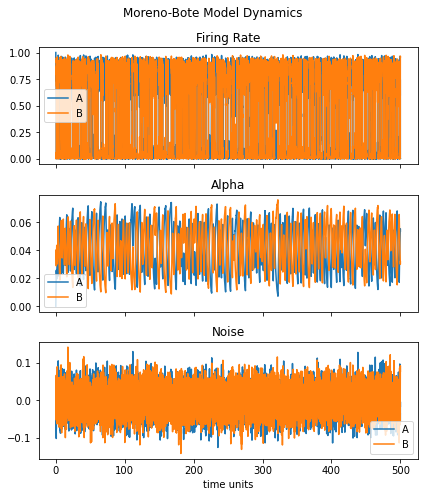

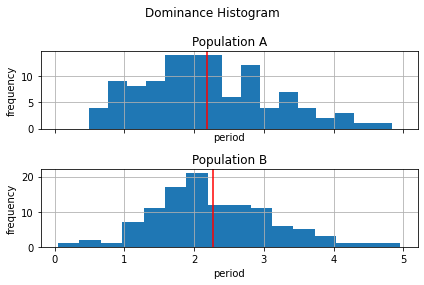

mean for population A: 2.1890178571428582
mean for population B: 2.2683928571428558


In [21]:
def plot_dominance_histogram(period, bins=16):
    mean_1 = np.mean(period[0,:])
    mean_2 = np.mean(period[1,:])

    fig,ax = plt.subplots(2, 1, sharex=True)
    fig.suptitle('Dominance Histogram')
        
    ax[0].hist(period[0,:], bins=bins)
    ax[0].axvline(mean_1, c='red')
    ax[0].set_ylabel('frequency')
    ax[0].set_xlabel('period')
    ax[0].set_title('Population A')
    ax[0].grid()
    
    ax[1].hist(period[1,:], bins=bins)
    ax[1].axvline(mean_2, c='red')
    ax[1].set_ylabel('frequency')
    ax[1].set_xlabel('period')
    ax[1].set_title('Population B')
    ax[1].grid()
    
    fig.tight_layout()
    plt.show()

    print('mean for population A: {}'.format(mean_1))
    print('mean for population B: {}'.format(mean_2))
    
del_t = 0.01
t = np.arange(0, 500, del_t)

y0 = [1, 0.01, 0, 0.04, 0, 0]

res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t)
dperiod = dominance_durations(res[:,0], res[:,1], t)
plot_moreno_bote_dynamics(res, t)
plot_dominance_histogram(dperiod)

### 2.7 Study the effect of $\gamma$

#### 2.7 a) Simulate with $\gamma=0$  (0.5 point)
Repeat your simulation with γ = 0 and estimate the mean dominance duration.


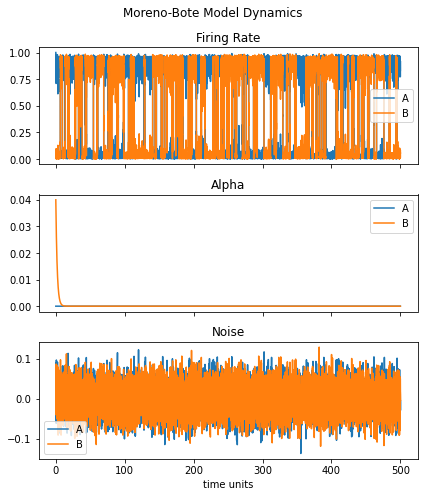

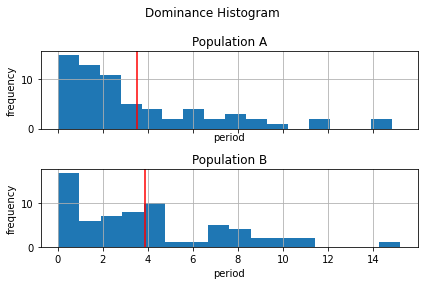

mean for population A: 3.508636363636365
mean for population B: 3.8683333333333323


In [22]:
res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t, {'gamma':0})
dperiod = dominance_durations(res[:,0], res[:,1], t)
plot_moreno_bote_dynamics(res, t)
plot_dominance_histogram(dperiod)

#### 2.8 b) Discuss the effect of $\gamma$ (0.5 points)
What is the influence of $\gamma$ in the model? How and why does the histogram change if you choose $\gamma$ = 0? 

It seems that the decrease in gamma shift the mean dominance period to be bigger. It also changes the distribution of the dominance period. When gamma = 0.1, the distirbution of the period seems to follow gaussion distirbution. However, when the gamma goes to zero, the distribution are more condensed at the smaller values hinting a poisson distribution. 
Looking at the dynamics, when gamma = 0, the value of alpha goes to zero. This resulting in more positive update of the rate and subsequently the increase in the period mean.


### 2.8 Find a different parameter set that produces similar dominance durations

#### 2.8 a) Find parameters and plot histograms (0.5 point)
Try to find a setting of parameters with $\gamma$ = 0 which has a mean dominance duration close (within 0.2 time units) to the first simulation from exercise 2.6.
Show all three duration distributions in one histogram plot.


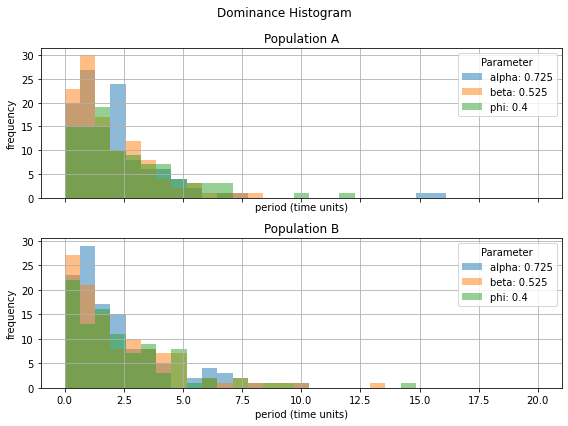

In [23]:
res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t, {'gamma':0, 'alpha':0.725})
dperiod1 = dominance_durations(res[:,0], res[:,1], t)

res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t, {'gamma':0, 'beta':0.525})
dperiod2 = dominance_durations(res[:,0], res[:,1], t)

res = euler_maruyama(f_moreno_bote, g_moreno_bote, y0, t, {'gamma':0, 'phi':0.4})
dperiod3 = dominance_durations(res[:,0], res[:,1], t)

mean_1A = np.mean(dperiod1[0,:])
mean_1B = np.mean(dperiod1[1,:])
mean_2A = np.mean(dperiod2[0,:])
mean_2B = np.mean(dperiod2[1,:])
mean_3A = np.mean(dperiod3[0,:])
mean_3B = np.mean(dperiod3[1,:])

bins=np.linspace(0, 20, 32)
alpha=0.5

fig,ax = plt.subplots(2, 1, sharex=True, figsize=(8,6))
fig.suptitle('Dominance Histogram')
    
ax[0].hist(dperiod1[0,:], bins=bins, alpha=alpha, label='alpha: 0.725')
ax[0].hist(dperiod2[0,:], bins=bins, alpha=alpha, label='beta: 0.525')
ax[0].hist(dperiod3[0,:], bins=bins, alpha=alpha, label='phi: 0.4')
ax[0].set_ylabel('frequency')
ax[0].set_xlabel('period (time units)')
ax[0].set_title('Population A')
ax[0].legend(title='Parameter')
ax[0].grid()

ax[1].hist(dperiod1[1,:], bins=bins, alpha=alpha, label='alpha: 0.725')
ax[1].hist(dperiod2[1,:], bins=bins, alpha=alpha, label='beta: 0.525')
ax[1].hist(dperiod3[1,:], bins=bins, alpha=alpha, label='phi: 0.4')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('period (time units)')
ax[1].set_title('Population B')
ax[1].legend(title='Parameter')
ax[1].grid()

fig.tight_layout()
plt.show()


#### 2.8 b) Discuss your results (0.5 point)
How do the histograms differ? How is that related to the parameters that you chose?

The distribution of the histogram looks different for every tweaked parameter. changing the value of phi gives relatively flatter distribution. alpha on the other hand, returns a sharp skew toward zero. 